# Serbornとは
- カテゴリデータを分類した可視化
- データの関係を可視化
- データの分布を可視化
- 回帰を可視化

## 6.2 APIの概要

### Matplotlibでグラフを描画する

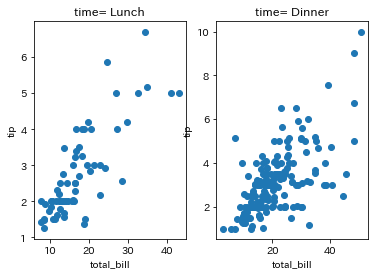

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.scatter(tips.loc[tips['time']=='Lunch', 'total_bill'],
            tips.loc[tips['time']=='Lunch', 'tip'])
ax1.set_title('time= Lunch')
ax1.set_xlabel('total_bill')
ax1.set_ylabel('tip')

ax2.scatter(tips.loc[tips['time']=='Dinner', 'total_bill'],
            tips.loc[tips['time']=='Dinner', 'tip'])       
    
ax2.set_title('time= Dinner')
ax2.set_xlabel('total_bill')
ax2.set_ylabel('tip');    

In [9]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### axes-lebelの関数でグラフを描画する

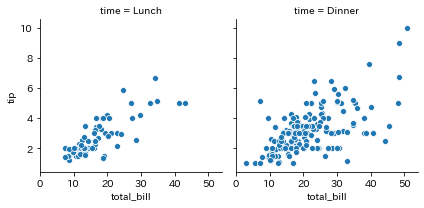

In [2]:
facet_grid = sns.FacetGrid(tips, col='time')
facet_grid.map(sns.scatterplot, 'total_bill', 'tip')

### figure-levelの関数でグラフを描画する

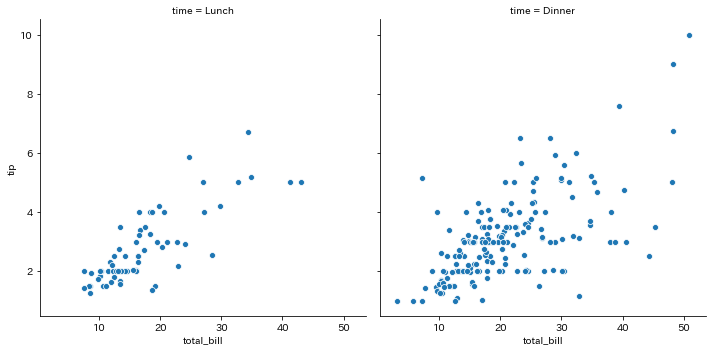

In [23]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time")

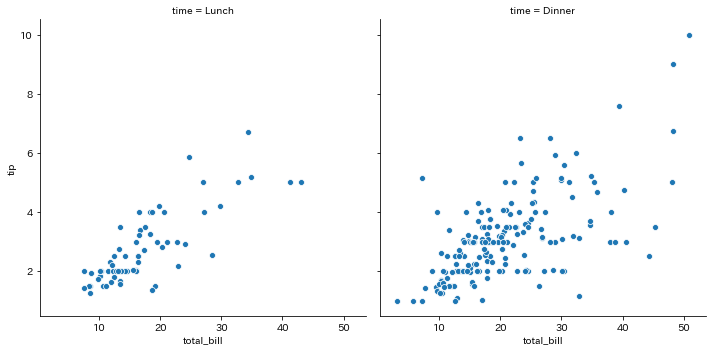

In [19]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time")

## 6.3 グラフの描画方法

### 単一のグラフを描画する(サブプロットオブジェクト)

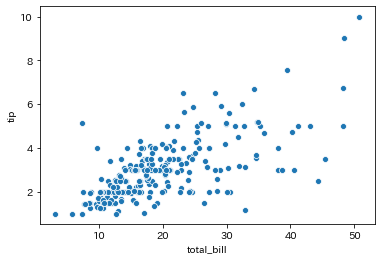

In [25]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

### Matplotlibのサブプロットとして描画

Text(0.5, 1.0, 'size and tips')

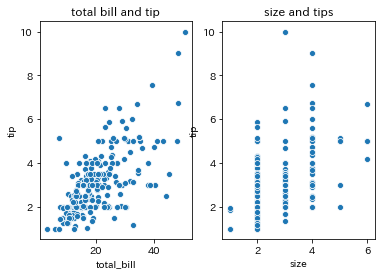

In [26]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=ax1)
sns.scatterplot(data=tips, x='size', y='tip', ax=ax2)
ax1.set_title('total bill and tip')
ax2.set_title('size and tips')

### 複数の種類のグラフ組み合わせる(jointGridオブジェクト)

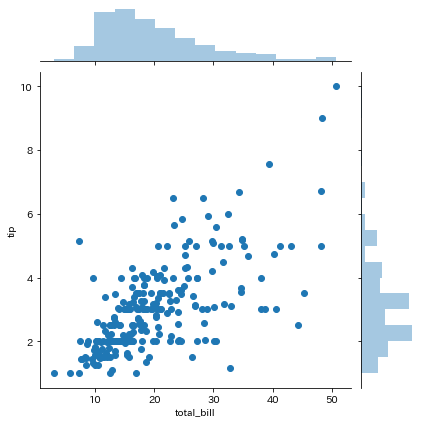

In [30]:
sns.jointplot(data=tips, x='total_bill', y='tip')

### データセットを切り出してグラフを分割する(FacetGridオブジェクト)

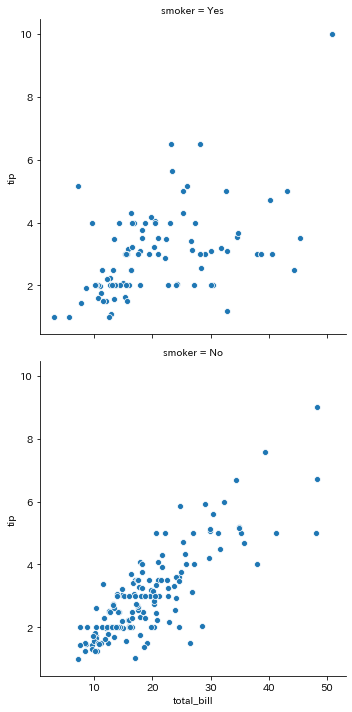

In [31]:
# 縦にサブプロットを並べて描画
sns.relplot(data=tips, x='total_bill', y='tip', row='smoker')

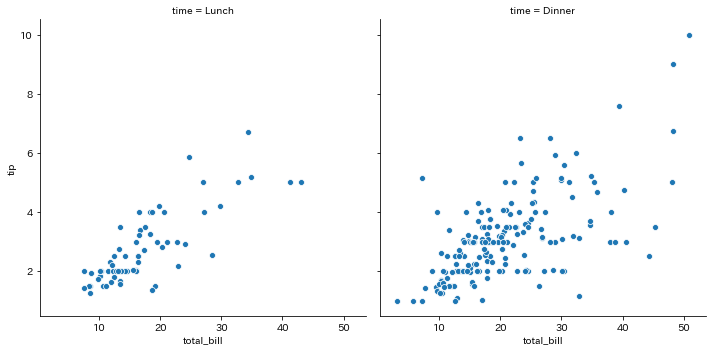

In [32]:
# 横にサブプロットを並べて描画
sns.relplot(data=tips, x='total_bill', y='tip', col='time')

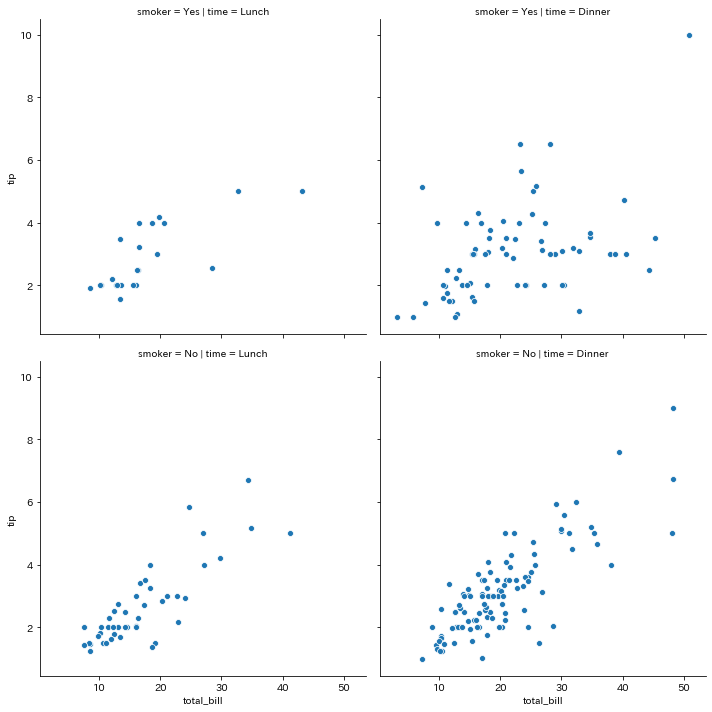

In [34]:
# 行と列にサブプロットを並べて描画
sns.relplot(data=tips, x='total_bill', y='tip',row='smoker', col='time')

### データの組み合わせからサブプロットごとに描画する(PairGridオブジェクト)

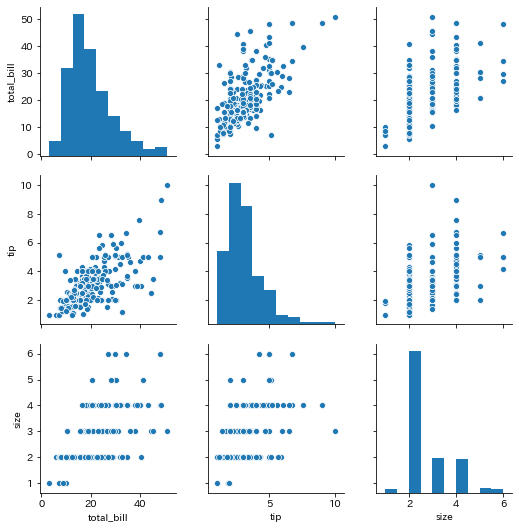

In [36]:
sns.pairplot(data=tips, vars=['total_bill', 'tip', 'size'])

## 6.4 データの関係の可視化

### replot()関数で描画した散布図

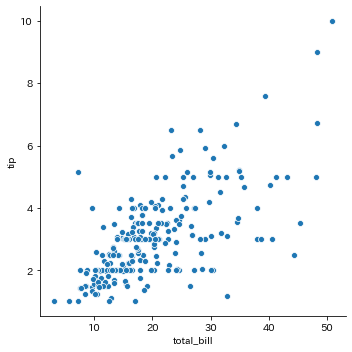

In [42]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter')

#### 要素を分類して可視化する

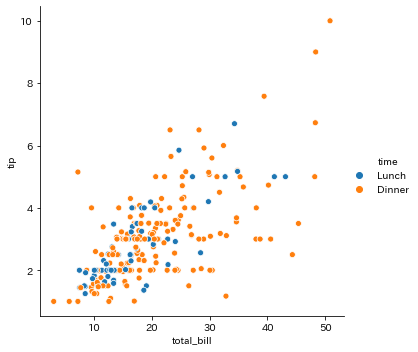

In [43]:
# 引数hueを使うと要素を色分けして表示
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', hue='time')

#### 要素ごとに異なるマーカーで描画

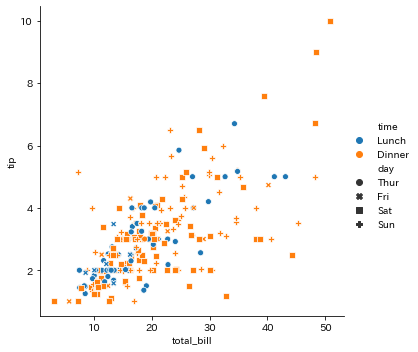

In [44]:
# 引数styleを使うと要素ごとに異なるマーカで描画
sns.relplot(data=tips, x='total_bill', y='tip', hue='time', style='day')

#### 引数hueに連続データを渡すとカラーパレットが適応され色の濃淡で表される

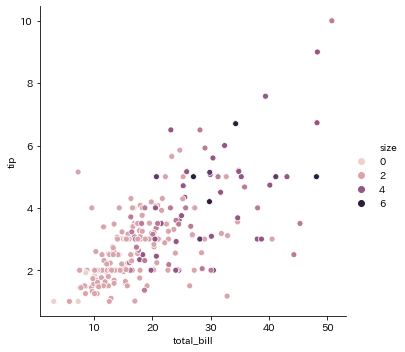

In [48]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='size')

#### 引数sizeに列名を渡すと値を要素の大きさで表現する

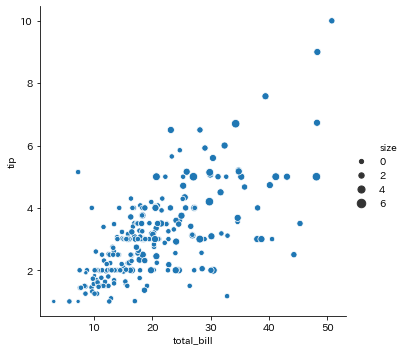

In [49]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size')

### 折れ線グラフを描画する

In [50]:
#　fmriデータセットの読み込み
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


#### maplotlibで折れ線グラフを表示

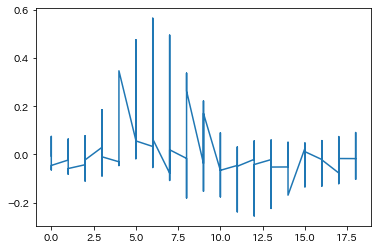

In [54]:
import matplotlib.pyplot as plt

sorted_fmri = fmri.sort_values('timepoint')
fig, ax = plt.subplots()
ax.plot(sorted_fmri['timepoint'], sorted_fmri['signal'])

#### relplot関数で描画

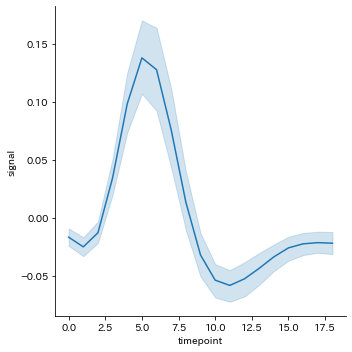

In [55]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line')

#### 引数ciを変更すると塗りつぶし色の描画方法を変更できる
- 0-100までのint型:指定したパーセント値の信頼区間
- 'sd':標準偏差
- 'None':非表示

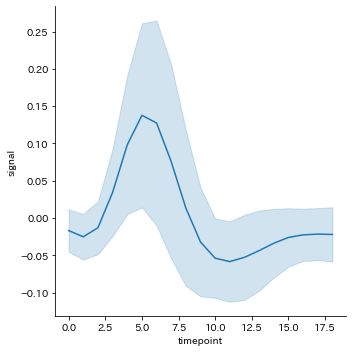

In [56]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', ci='sd')

#### データ集計しない場合は引数estimatorにNoneを渡す

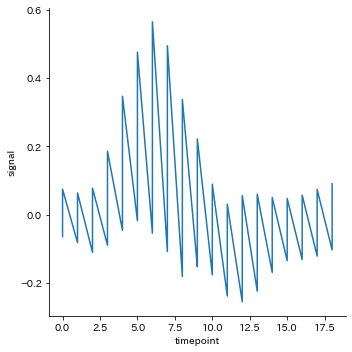

In [57]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', estimator=None)

#### 色と線種で分類した複数の折れ線グラフ

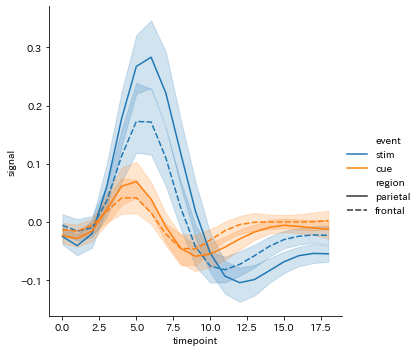

In [58]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='event', style='region')

### ファセットを利用する

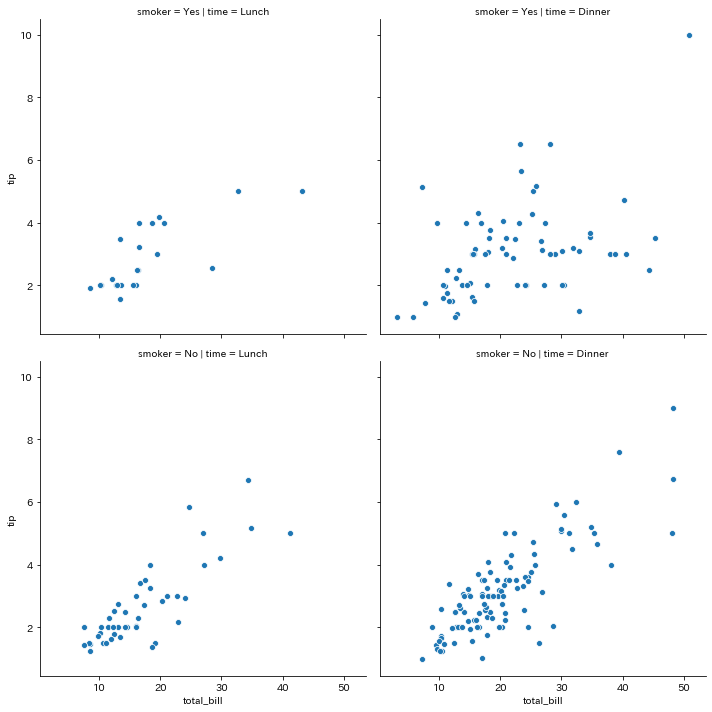

In [59]:
sns.relplot(data=tips, x='total_bill', y='tip',row='smoker', col='time')

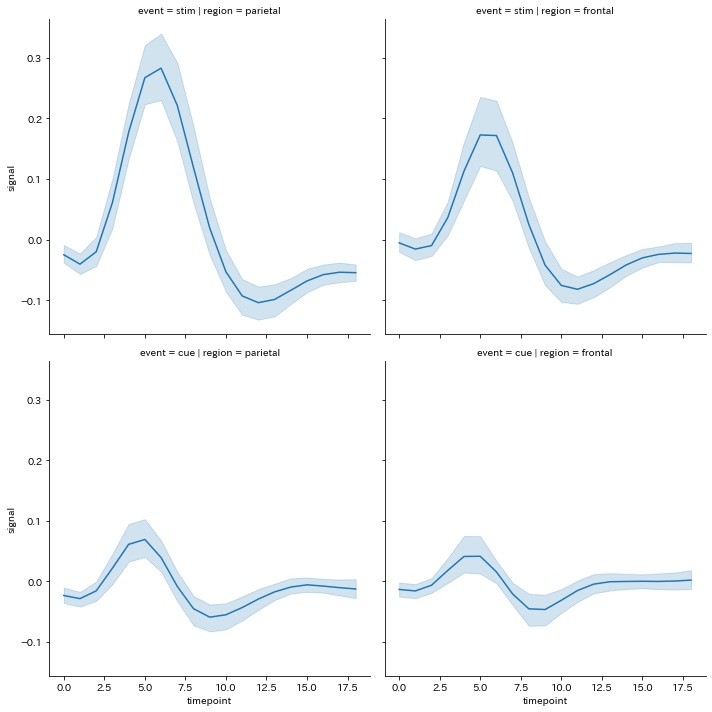

In [60]:
# 折れ線グラフの描画
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', row='event', col='region')

## 6.5 カテゴリデータの可視化

In [2]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### ストリッププロットを描画する

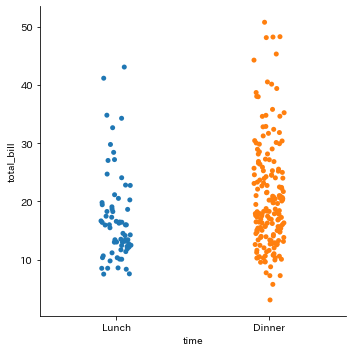

In [62]:
sns.catplot(data=tips, x='time', y='total_bill', kind='strip')

#### ストリッププロットを横にするにはY軸をカテゴリデータにする

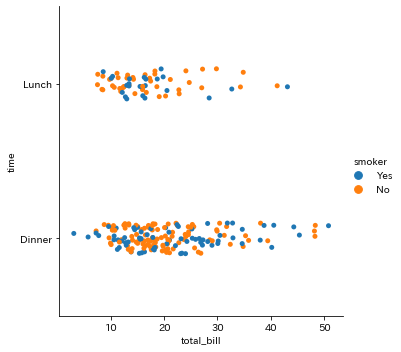

In [63]:
sns.catplot(data=tips, x='total_bill', y='time', hue='smoker')

#### ジッタ(ゆらぎ)を調整することで重なった点をランダムにずらす

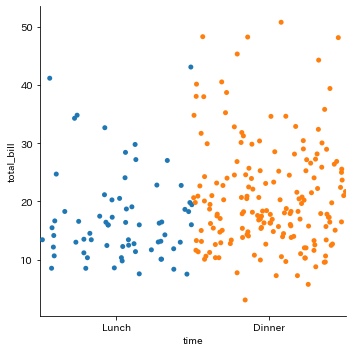

In [5]:
sns.catplot(data=tips, x='time', y='total_bill', jitter=0.5)

#### 引数kind='swarm'にするとビースウォームプロット(蜂群図)が出来る

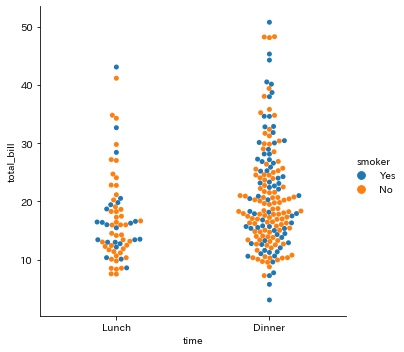

In [72]:
sns.catplot(data=tips, x='time', y='total_bill', hue='smoker', kind='swarm')

#### 引数kind='box'にすると箱ひげ図が描画される

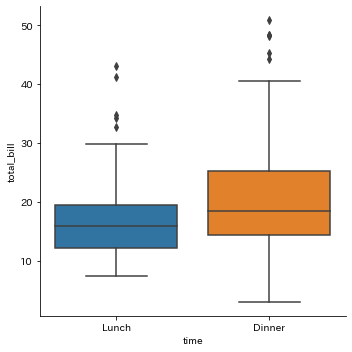

In [73]:
sns.catplot(data=tips, x='time', y='total_bill', kind='box')

#### 引数hueを使うとサブカテゴリとして分割して表示する

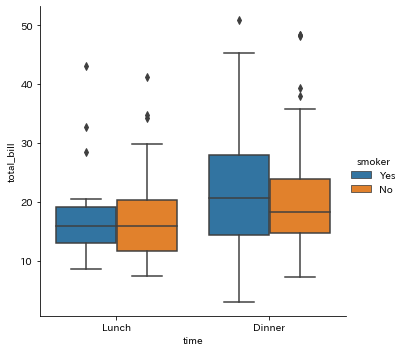

In [75]:
sns.catplot(data=tips, x='time', y='total_bill', kind='box', hue='smoker')

#### 引数kind='boxen'とすると、分位数を増やした箱ひげ図を描画できる

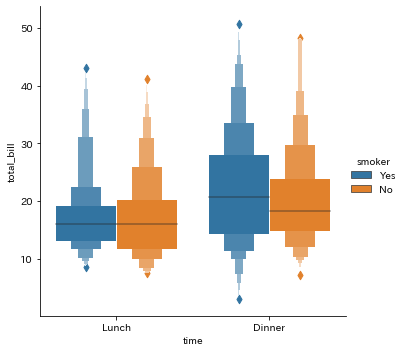

In [76]:
sns.catplot(data=tips, x='time', y='total_bill', kind='boxen', hue='smoker')

#### 引数kind='violin'とすると、バイオリン図(確率密度を表現したグラフ)を描画する

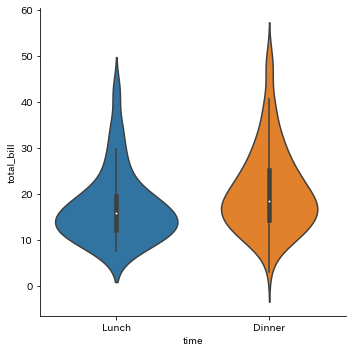

In [77]:
sns.catplot(data=tips, x='time', y='total_bill', kind='violin')

#### バイオリン図で2値カテゴリの場合、左右で分割して描画出来る

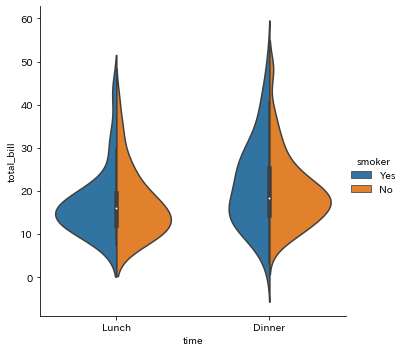

In [78]:
sns.catplot(data=tips, x='time', y='total_bill', kind='violin', hue='smoker', split=True)

#### 引数kind='bar' にすると、カテゴリごとの平均値を棒グラフにし、信頼区間をエラーバーで表示する

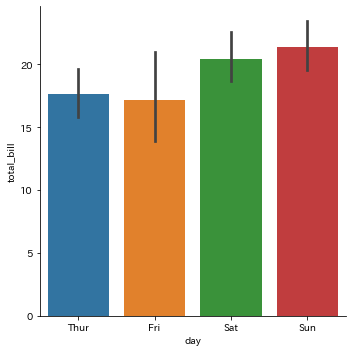

In [6]:
sns.catplot(data=tips, x='day', y='total_bill', kind='bar')

#### 棒グラフで引数estimatorでデータを集計する関数を渡す事が出来る

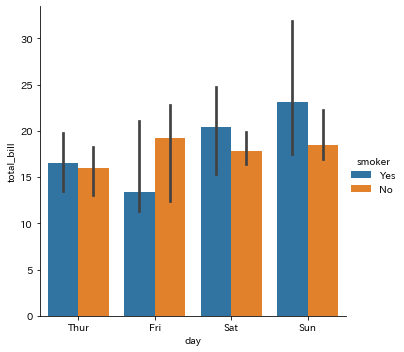

In [7]:
import numpy as np

sns.catplot(data=tips, x='day', y='total_bill', kind='bar', hue='smoker', estimator=np.median)

#### データの個数を棒グラフに描画するには引数kind='count'とする

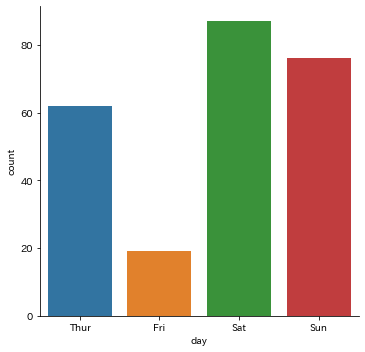

In [8]:
sns.catplot(data=tips, x='day', kind='count')

#### 引数kind='point' にすると、ポイントプロット(デフォルトでは平均値)を表示する

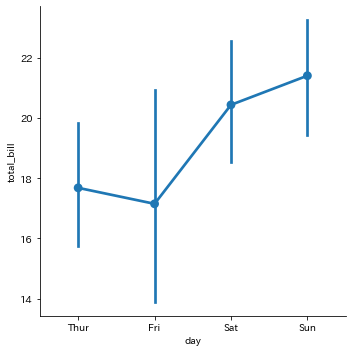

In [10]:
sns.catplot(data=tips, x='day', y='total_bill',kind='point')

#### estimatorで中央値にして描画

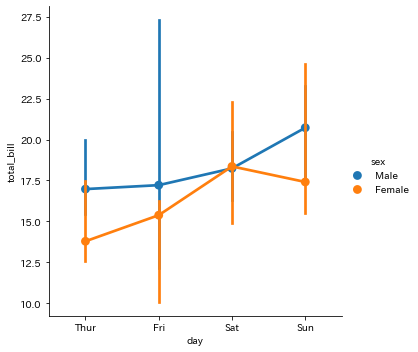

In [11]:
sns.catplot(data=tips, x='day', y='total_bill', kind='point', estimator=np.median, hue='sex')

#### catplot関数でファセットを利用する

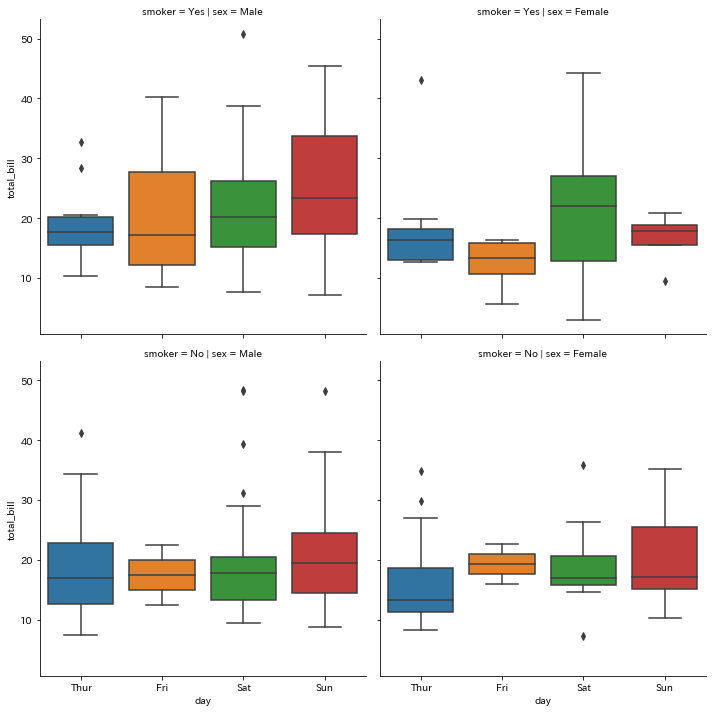

In [12]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box', row='smoker', col='sex')

## 6.6 データ分布の可視化

In [13]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### distplot()関数でヒストグラムを描画する

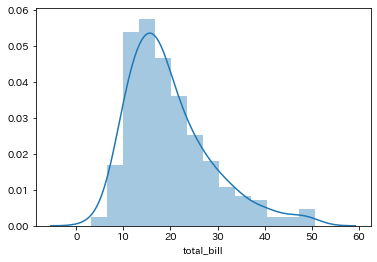

In [14]:
sns.distplot(tips['total_bill'])

#### ラグプロットとbin数を指定

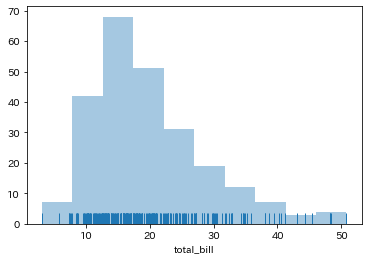

In [15]:
sns.distplot(tips['total_bill'], hist=True, kde=False, rug=True, bins=10)

#### 度数のヒストグラムと相対度数のヒストグラムを並べて描画

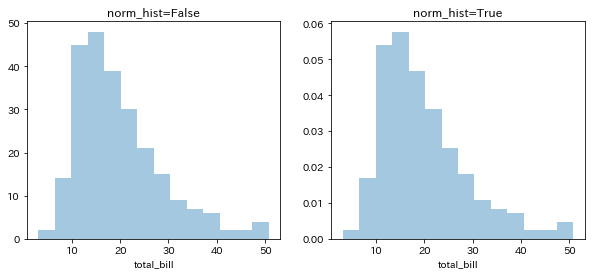

In [18]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax1.set_title('norm_hist=False')
ax2.set_title('norm_hist=True')
sns.distplot(tips['total_bill'], kde=False, ax=ax1)
sns.distplot(tips['total_bill'], kde=False, norm_hist=True, ax=ax2)

#### 引数fitに確率密度関数を渡すと任意の分布を適合できる

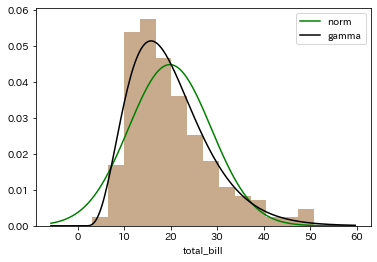

In [20]:
from scipy import stats

fig, ax = plt.subplots()
sns.distplot(
    tips['total_bill'],
    kde=False,
    fit=stats.norm, # 正規分布
    fit_kws={'label': 'norm', 'color': 'g'},
    ax=ax,
)

sns.distplot(
    tips['total_bill'],
    kde=False,
    fit=stats.gamma, # ガンマ分布
    fit_kws={'label': 'gamma', 'color': 'k'},
    ax=ax,
)

ax.legend()

#### jointplot()関数で2変数の分布を可視化する

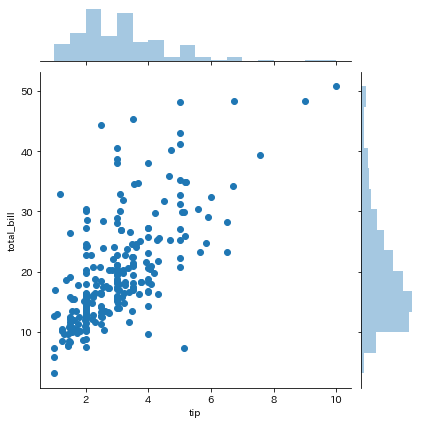

In [22]:
sns.jointplot(data=tips, x='tip', y='total_bill')

#### カーネル密度推定した2変数分布

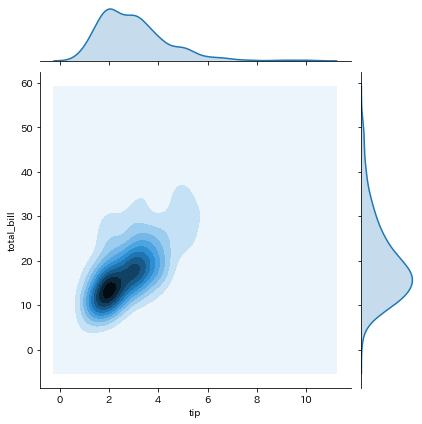

In [26]:
sns.jointplot(data=tips, x='tip', y='total_bill', kind='kde')

## 6.7 回帰の可視化

#### lmplot()関数で散布図、回帰モデルから得られた回帰直線、回帰直線の95%信頼区間を描画出来る

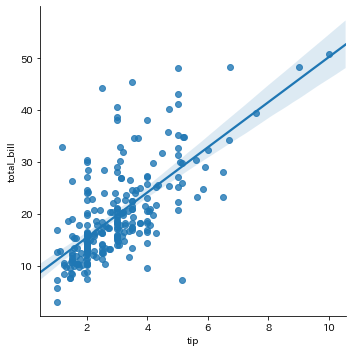

In [27]:
sns.lmplot(data=tips, x='tip', y='total_bill')

#### データを分類して描画

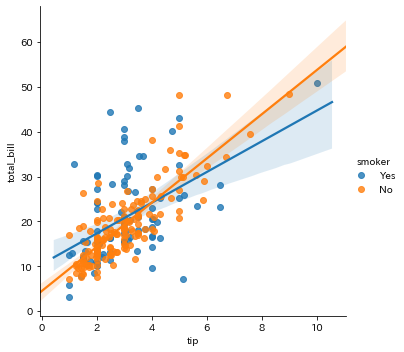

In [28]:
sns.lmplot(data=tips, x='tip', y='total_bill', hue='smoker')

#### 信頼区間を変更するには、引数ciに0から100までのint型を渡す

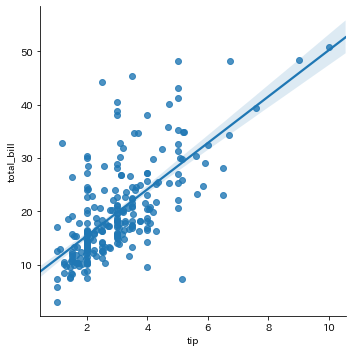

In [29]:
sns.lmplot(data=tips, x='tip', y='total_bill', ci=80)

#### 多項式による回帰を行うには引数orderに次数を渡す　グラフは二次の曲線

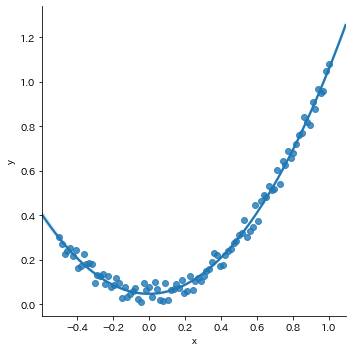

In [34]:
import numpy as np
import pandas as pd

squared_x = np.linspace(-0.5, 1, 100)
# xを2乗し一様乱数を計算
squared_y = squared_x ** 2 + np.random.rand(100) * 0.1
data = pd.DataFrame({'x': squared_x, 'y': squared_y})
sns.lmplot(data=data, x='x', y='y', order=2)

#### 引数robust=Trueだとロバスト回帰モデル(外れ値の重みを軽く扱う)

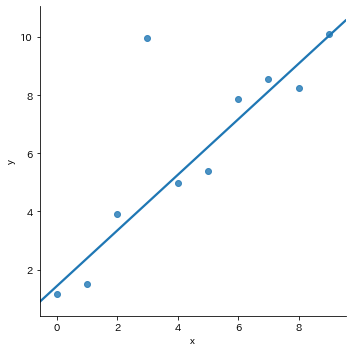

In [35]:
liner_x = np.arange(10)
liner_y = liner_x + np.random.rand(10) * 2
liner_y[3] = liner_y[3] + 5 #外れ値を作成
data = pd.DataFrame({'x': liner_x, 'y': liner_y})
sns.lmplot(data=data, x='x', y='y', ci=None, robust=True)

#### ファセットを利用した回帰グラフ

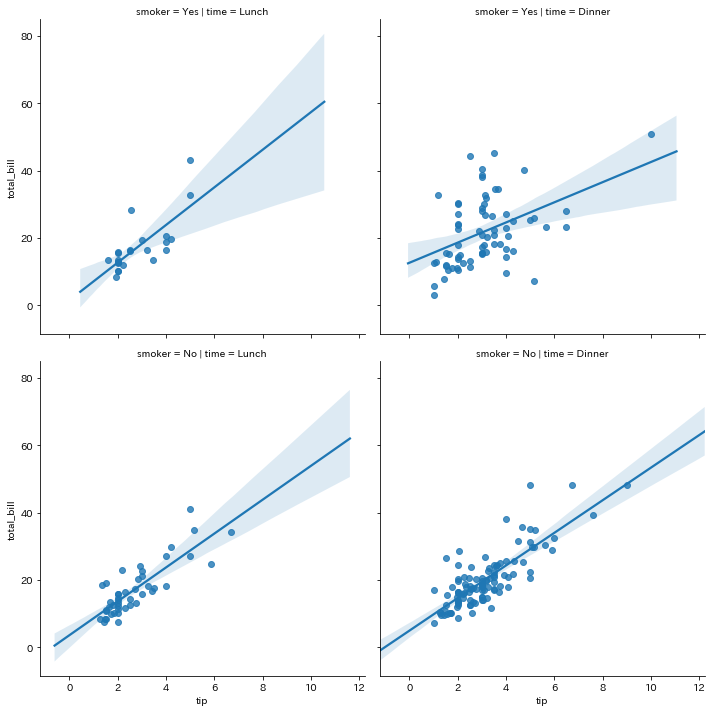

In [36]:
sns.lmplot(data=tips, x='tip', y='total_bill', row='smoker', col='time')

#### 回帰グラフとヒストグラム、カーネル密度推定したグラフを描画

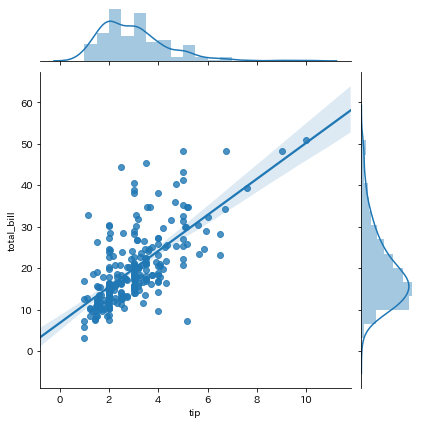

In [38]:
sns.jointplot(data=tips, x='tip', y='total_bill', kind='reg')

#### pairplot()関数は散布行列を描画する。引数kind='reg'だと回帰グラフになる

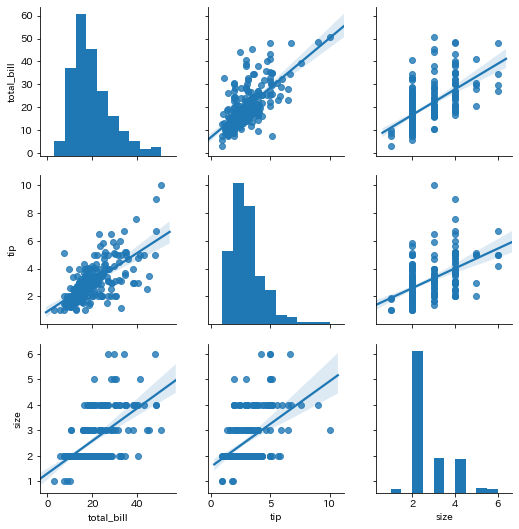

In [39]:
sns.pairplot(data=tips, kind='reg')

## 第7章 seabornを使いこなす

### ■FacetGridクラスを利用する

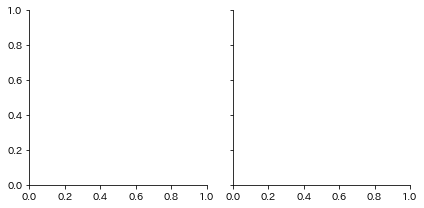

In [41]:
# 第一引数にFataFrame、colに分類対象の列名を渡す
sns.FacetGrid(tips, col='time')

#### Matplotlibの関数でファセットを利用する

In [42]:
# map()メソッドの引数にグラフを描画する関数を渡す

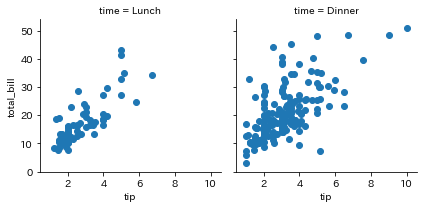

In [43]:
import matplotlib.pyplot as plt

facet_grid = sns.FacetGrid(tips, col='time')
facet_grid.map(plt.scatter, 'tip', 'total_bill')

#### サブプロットを縦に並べる

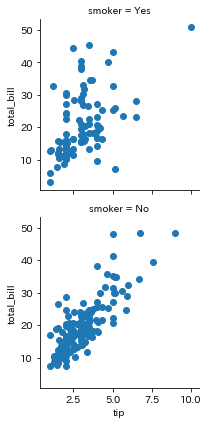

In [44]:
sns.FacetGrid(tips, row='smoker').map(plt.scatter, 'tip', 'total_bill')

#### 格子状に並べて色分けする

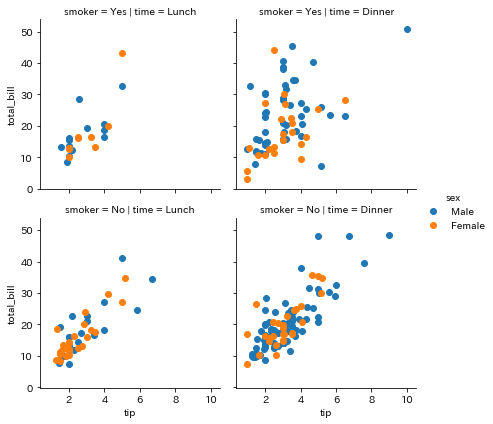

In [45]:
facet_grid = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet_grid.map(plt.scatter, 'tip', 'total_bill')
facet_grid.add_legend()

#### seabornの関数を利用する

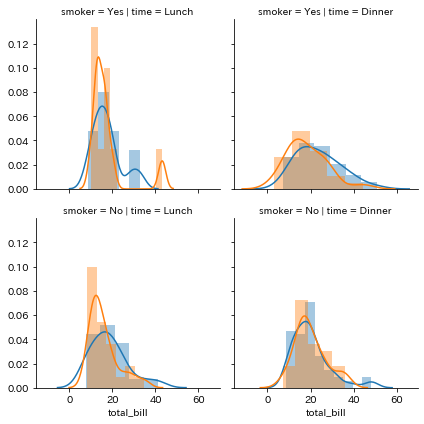

In [46]:
facet_grid = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet_grid.map(sns.distplot, 'total_bill')

#### カスタマイズした関数を利用する

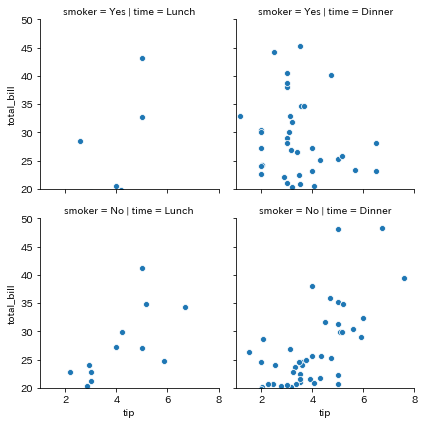

In [5]:
def scatter_set_lim(x, y, color, xlim=None, ylim=None):
    ax = sns.scatterplot(x=x, y=y)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

facet_grid = sns.FacetGrid(tips, col='time', row='smoker')
facet_grid.map(scatter_set_lim, 'tip', 'total_bill', xlim=[1,8], ylim=[20, 50])

### ■PairGridクラスを利用する

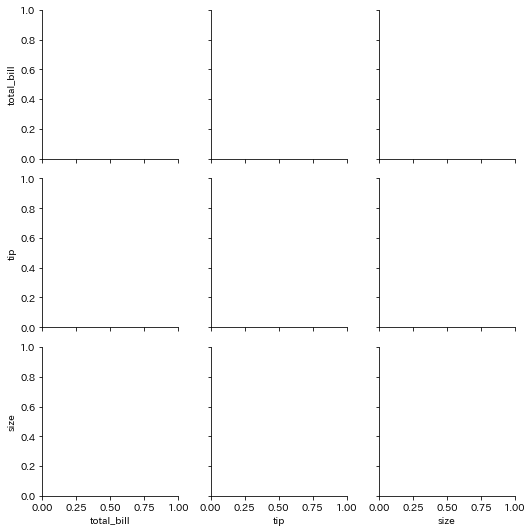

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
sns.PairGrid(tips)

#### グラフを描画する

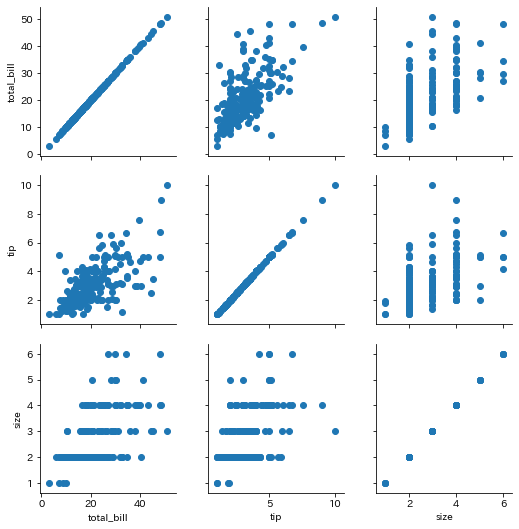

In [2]:
import matplotlib.pyplot as plt

pair_grid = sns.PairGrid(tips)
pair_grid.map(plt.scatter)

#### 色分けする

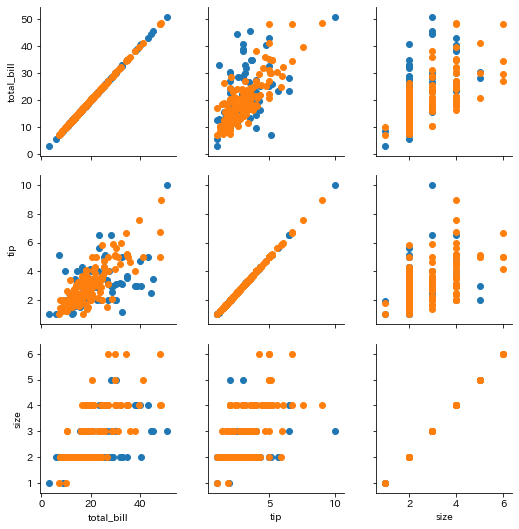

In [8]:
sns.PairGrid(tips, hue='smoker').map(plt.scatter)

#### 複数の種類のグラフを描画する

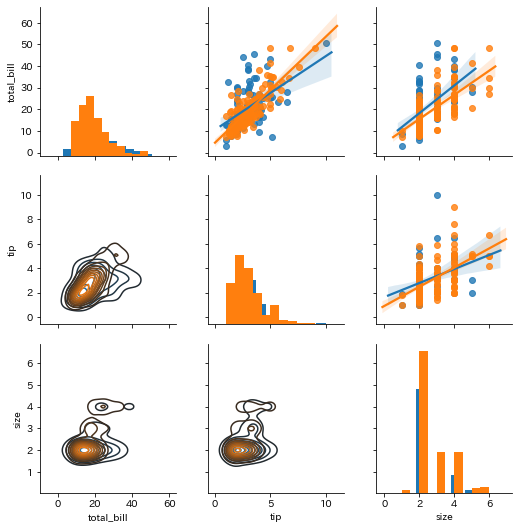

In [9]:
pair_grid_kinds = sns.PairGrid(tips, hue='smoker')
pair_grid_kinds.map_upper(sns.regplot)
pair_grid_kinds.map_diag(plt.hist)
pair_grid_kinds.map_lower(sns.kdeplot)

#### 描画対象列を指定する

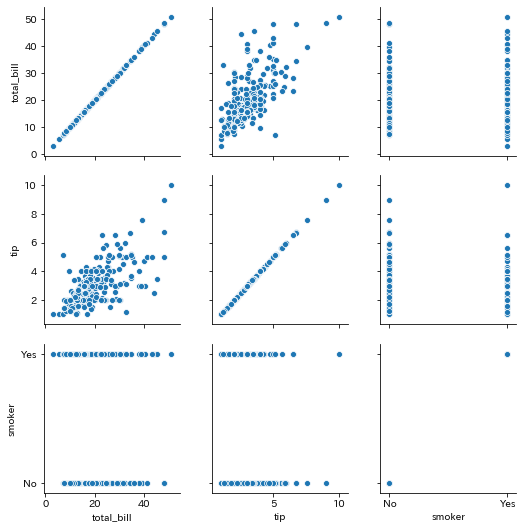

In [12]:
# 引数varsに列名をリストで渡すと描画対象となる列を指定できる
sns.PairGrid(tips, vars=['total_bill', 'tip', 'smoker']).map(sns.scatterplot)

#### X値・Y値を取る列名を指定

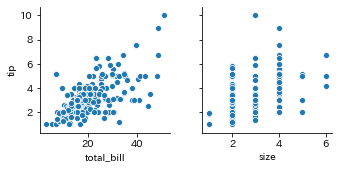

In [13]:
sns.PairGrid(tips, x_vars=['total_bill', 'size'], y_vars=['tip']).map(sns.scatterplot)

### ■ジョイントグリッドの活用

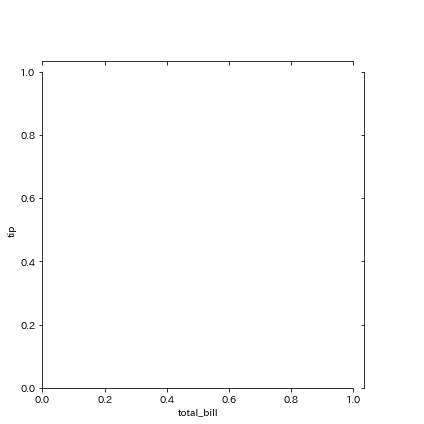

In [14]:
sns.JointGrid(data=tips, x='total_bill', y='tip')

#### グラフを描画し辺にグラフを追加する

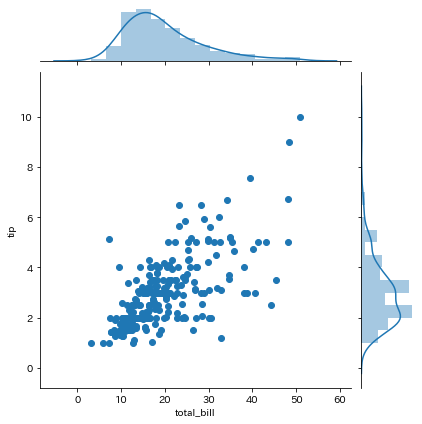

In [15]:
joint_grid = sns.JointGrid(data=tips, x='total_bill', y='tip')
joint_grid.plot(plt.scatter, sns.distplot)

#### JointGridオブジェクトのplot_joint()メソッドとplot_marginals()メソッドを用いても同じグラフが描画出来る

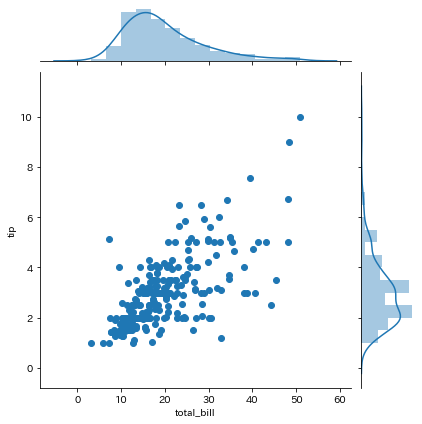

In [16]:
joint_grid = sns.JointGrid(data=tips, x='total_bill', y='tip')
joint_grid.plot_joint(plt.scatter)
joint_grid.plot_marginals(sns.distplot)

#### Matplotlibのメソッド利用

{'whiskers': [<matplotlib.lines.Line2D at 0x2261e532848>,
 'caps': [<matplotlib.lines.Line2D at 0x2261e55ce48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2261e55c688>],
 'medians': [<matplotlib.lines.Line2D at 0x2261e56c488>],
 'fliers': [<matplotlib.lines.Line2D at 0x2261e570fc8>],
 'means': []}

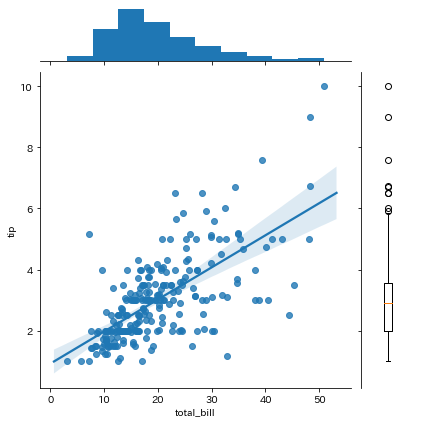

In [17]:
joint_grid_ax = sns.JointGrid(data=tips, x='total_bill', y='tip')
joint_grid_ax.plot_joint(sns.regplot)
joint_grid_ax.ax_marg_x.hist(tips['total_bill'])
joint_grid_ax.ax_marg_y.boxplot(tips['tip'])

### ■axes-level関数の利用

#### グラフを重ねて描画する

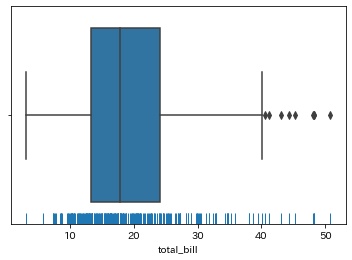

In [18]:
# Matplotlib同様に同一サブプロットにグラフ描画すると同じサブプロットにグラフが重ねて描画される
tips = sns.load_dataset('tips')
sns.boxplot(data=tips, x='total_bill')
sns.rugplot(tips['total_bill'])

#### 複数のサブプロットに描画する

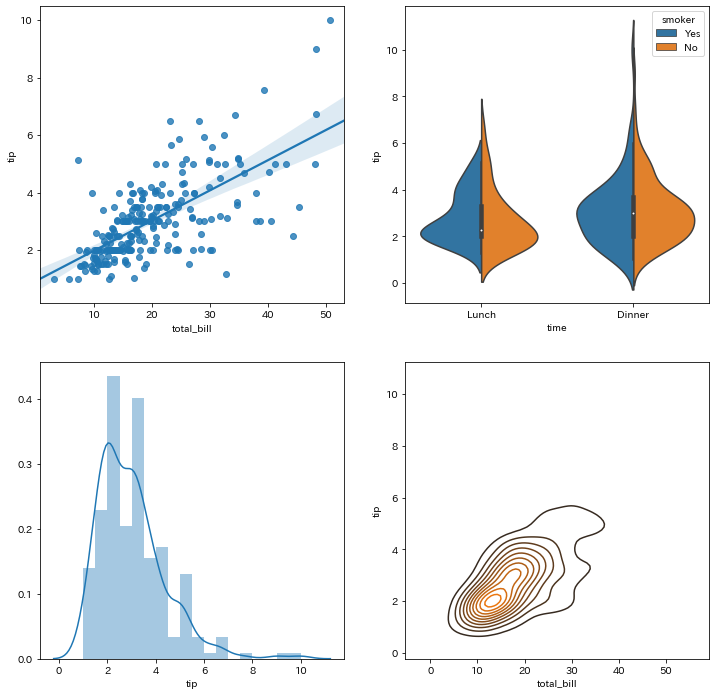

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.regplot(data=tips, x='total_bill', y='tip', ax=ax[0][0])
sns.violinplot(data=tips, x='time', y='tip', hue='smoker', split=True, ax=ax[0][1])
sns.distplot(tips['tip'], ax=ax[1][0])
sns.kdeplot(tips['total_bill'], tips['tip'], ax=ax[1][1])

#### 散布図を描画する

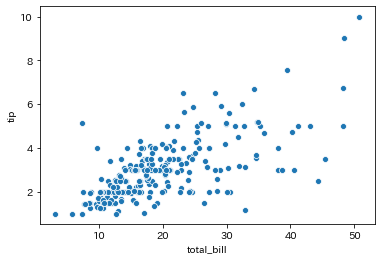

In [21]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

#### 散布図で要素を分割して描画

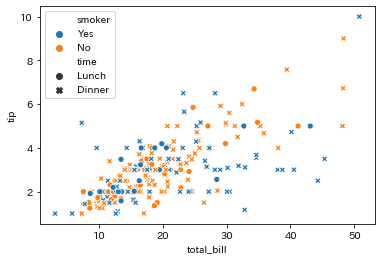

In [22]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', style='time')

#### 折れ線グラフを描画する

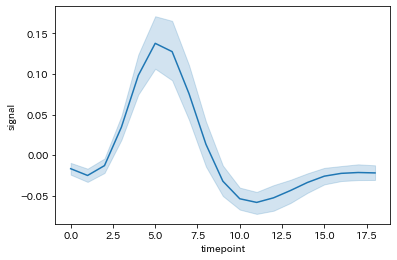

In [3]:
fmri = sns.load_dataset('fmri')
sns.lineplot(data=fmri, x='timepoint', y='signal')

#### 折れ線グラフに要素を分割して描画

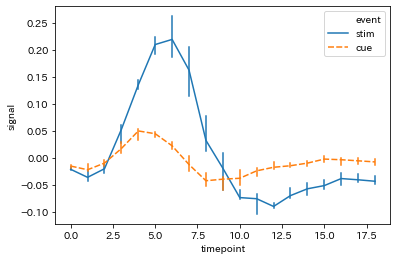

In [25]:
import numpy as np

sns.lineplot(data=fmri,
            x='timepoint',
            y='signal',
            estimator=np.median,
            hue='event',
            style='event',
            err_style='bars',
            ci=68)

#### ストリッププロットを描画する

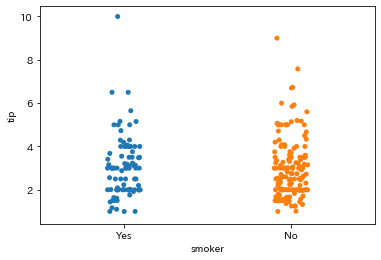

In [27]:
sns.stripplot(data=tips, x='smoker', y='tip')

#### ストリッププロットをカスタマイズする

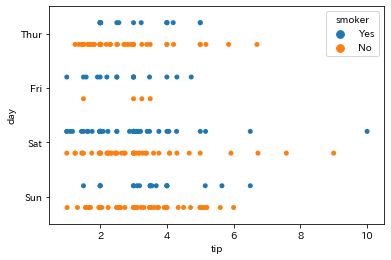

In [29]:
sns.stripplot(data=tips,
             x='tip',
             y='day',
             orient='h',
             hue='smoker',
             jitter=0,
             dodge=True)

#### ビースウォームプロットを描画する

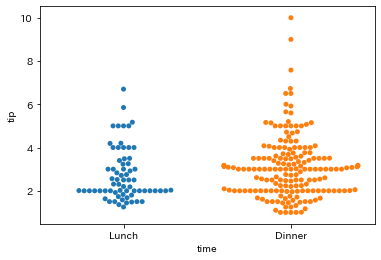

In [30]:
sns.swarmplot(data=tips, x='time', y='tip')

#### ビースウォームプロットをカスタマイズする

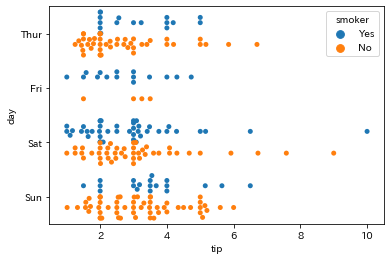

In [31]:
sns.swarmplot(data=tips,
             x='tip',
             y='day',
             orient='h',
             hue='smoker',             
             dodge=True)

#### 箱ひげ図を描画する

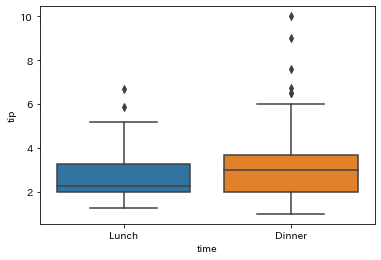

In [32]:
sns.boxplot(data=tips, x='time', y='tip')

#### 箱ひげ図を色分けして描画

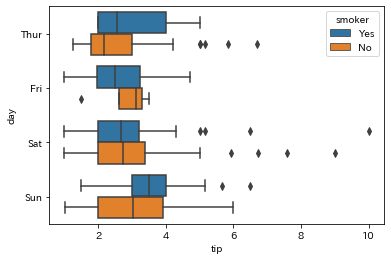

In [34]:
sns.boxplot(data=tips, x='tip', y='day', orient='h', hue='smoker')

#### 分位数を増やした箱ひげ図

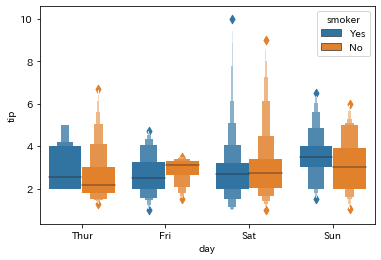

In [35]:
sns.boxenplot(data=tips, x='day', y='tip', hue='smoker')

#### バイオリン図を描画する

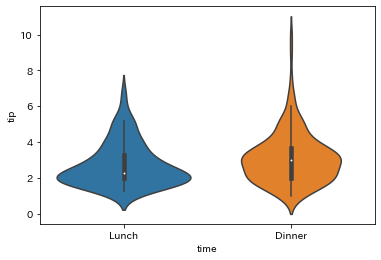

In [36]:
sns.violinplot(data=tips,x='time', y='tip')

#### バイオリン図に要素を分割して描画

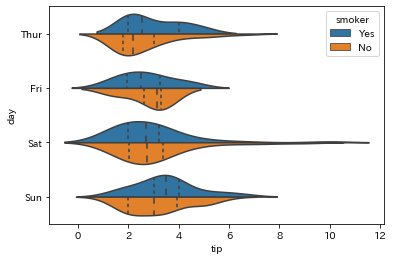

In [37]:
sns.violinplot(data=tips,
              x='tip',
              y='day',
              orient='h',
              hue='smoker',
              split=True,
              inner='quartile')

#### ポイントプロットを描画する

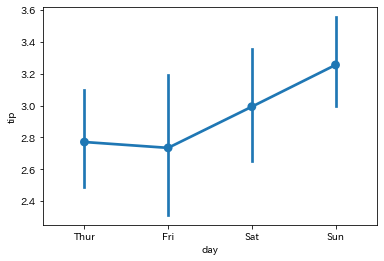

In [38]:
sns.pointplot(data=tips, x='day', y='tip')

#### ポイントプロットを色分けして描画

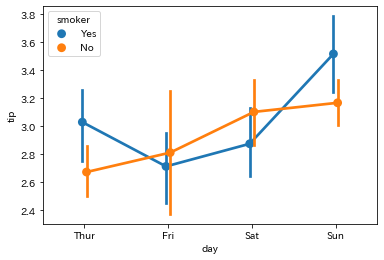

In [39]:
sns.pointplot(data=tips,
             x='day',
             y='tip',
             hue='smoker',
             ci=66,
             dodge=True,
             estimatpr=np.median)

#### 棒グラフを描画する

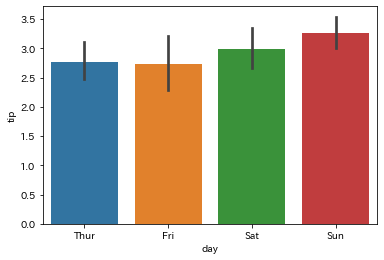

In [4]:
sns.barplot(data=tips, x='day', y='tip')

#### 棒グラフを色分けして描画

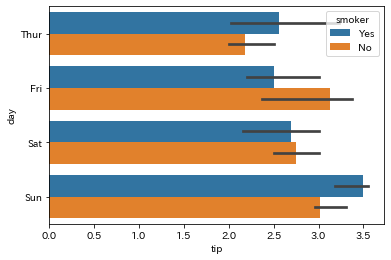

In [5]:
sns.barplot(data=tips,
           x='tip',
           y='day',
           orient='h',
           hue='smoker',
           estimator=np.median,
           ci=68)

#### データの個数を棒グラフに描画

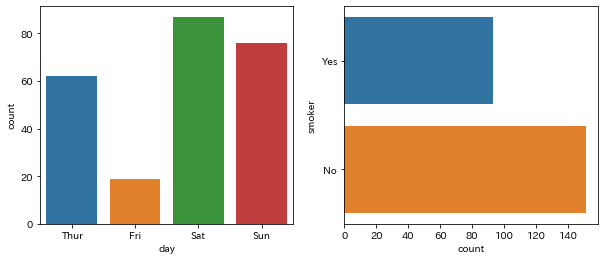

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(data=tips, x='day', ax=ax[0])
sns.countplot(data=tips, y='smoker', ax=ax[1])

#### データの個数をグループ化して描画する

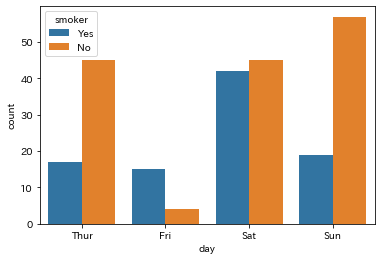

In [7]:
sns.countplot(data=tips, x='day', hue='smoker')

#### ヒストグラム・カーネル密度推定グラフを描画する

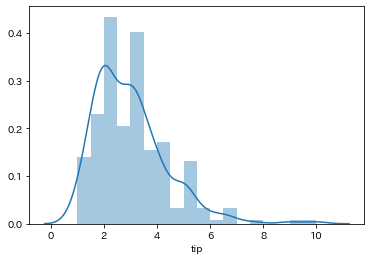

In [8]:
sns.distplot(tips['tip'])

#### distplot()に描画方法を指定

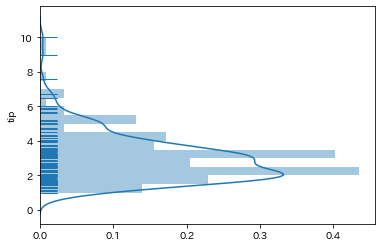

In [9]:
sns.distplot(tips['tip'], vertical=True, hist=True, kde=True, rug=True)

#### カーネル密度推定グラフを描画する

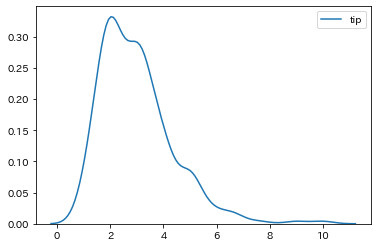

In [10]:
sns.kdeplot(tips['tip'])

#### カーネル密度推定グラフで2変数の分布を描画

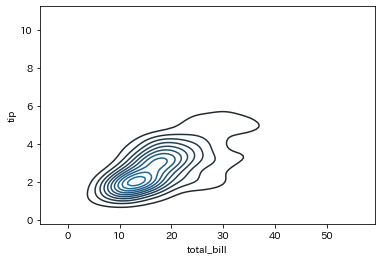

In [11]:
sns.kdeplot(data=tips['total_bill'], data2=tips['tip'])

#### ラグプロットを描画する

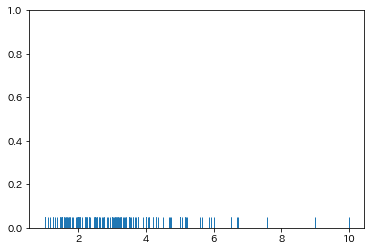

In [12]:
sns.rugplot(tips['tip'])

#### ラグプロットをY軸に沿って描画

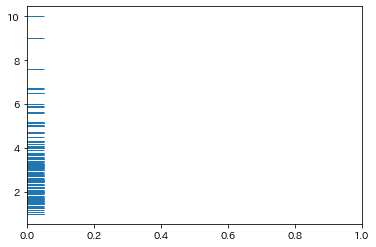

In [13]:
sns.rugplot(tips['tip'], axis='y')

#### 回帰グラフを描画する

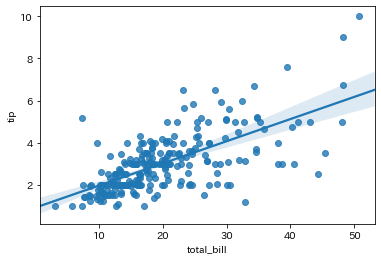

In [14]:
sns.regplot(data=tips, x='total_bill', y='tip')

#### 回帰グラフで信頼区間を変更

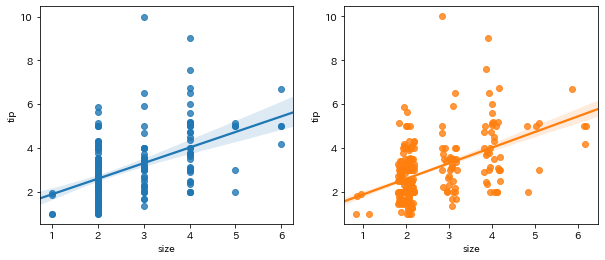

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.regplot(data=tips, x='size', y='tip', ax=ax1)
sns.regplot(data=tips, x='size', y='tip', ci=68, x_jitter=0.2, ax=ax2)

#### 回帰直線で代表値を描画する

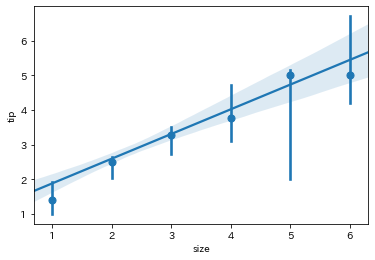

In [16]:
sns.regplot(data=tips, x='size', y='tip', x_estimator=np.median)

#### 回帰線の残差を可視化する

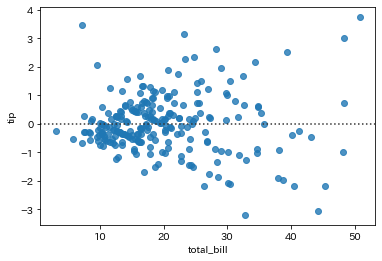

In [17]:
sns.residplot(data=tips, x='total_bill', y='tip')

#### Lowess平滑化・ロバスト回帰モデルの利用

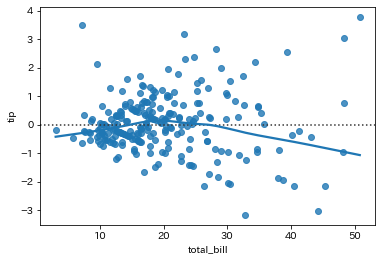

In [18]:
sns.residplot(data=tips, x='total_bill', y='tip', lowess=True, robust=True)

#### ヒートマップの描画

In [20]:
flights= sns.load_dataset('flights').pivot('month', 'year', 'passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


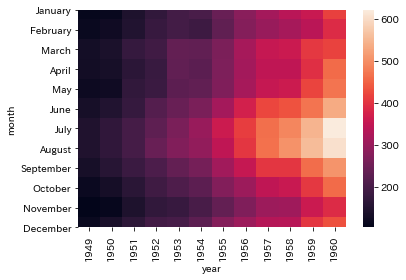

In [21]:
sns.heatmap(flights)

#### 指定したカラーマップでヒートマップを描画

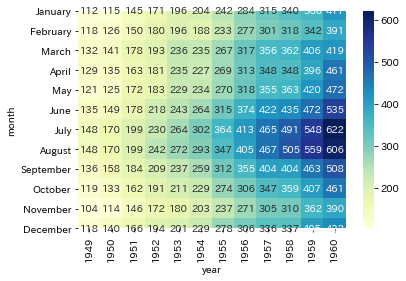

In [24]:
sns.heatmap(flights, cmap='YlGnBu', annot=True, fmt='d')

### ■グラフのスタイルと書式の設定

#### スタイル'whitegrid'の散布図を描画

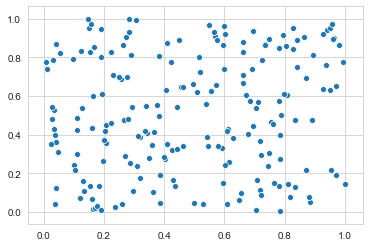

In [25]:
sns.set_style(style='whitegrid')
x,y = np.random.rand(2,200)
sns.scatterplot(x=x, y=y)

#### matplotlib.rcParamsを上書きして描画

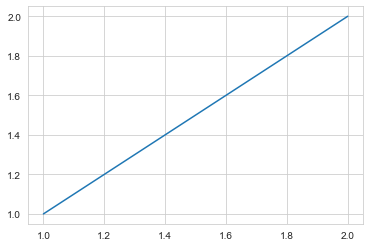

In [26]:
fig, ax = plt.subplots()
ax.plot([1,2], [1,2])

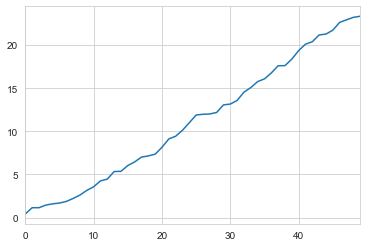

In [27]:
import pandas as pd

np.random.seed(1)
ser = pd.Series(np.random.rand(50).cumsum())
ser.plot()

#### グラフのスタイルを初期化して描画

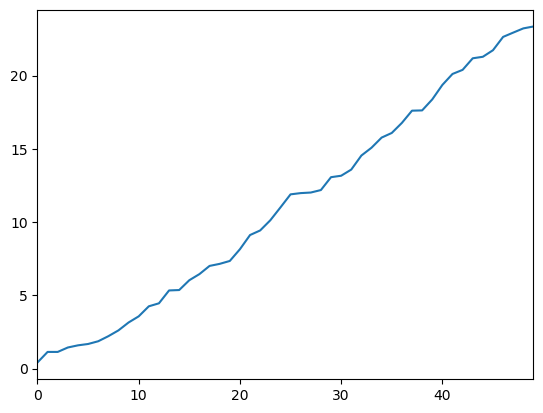

In [28]:
sns.reset_defaults()
ser.plot()

#### 書式を設定する

In [ ]:
sns.set_style(style={'axes.spines.top'})